In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1z9X640fGP2FJms3L-R_C0me1Hdwi4WvW'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Telco_Customer_Churn.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data and printing shape of data
df=pd.read_csv('Telco_Customer_Churn.csv')
print("Dataset Shape:", df.shape)

Dataset Shape: (7043, 21)


In [ ]:
df=pd.read_csv('Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Drop customerID as it does not help in predicting churn
df = df.drop(columns=['customerID'])

In [ ]:
# Converting TotalCharges to numeric and handling missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges' or other critical columns
df = df.dropna()

In [ ]:
# Converting Churn (target) to numerical values
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])  #Yes=1 and No=0

In [ ]:
# Identify categorical columns (excluding target)
categorical_columns = df.select_dtypes(include=['object']).columns

# Converting all categorical columns to numerical using LabelEncoder
for col in categorical_columns:
    if col != 'Churn':  #exclude target column 'Churn'
        df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Separate features X and target y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (5625, 19)
Testing Features Shape: (1407, 19)
Training Target Shape: (5625,)
Testing Target Shape: (1407,)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[913 120]
 [186 188]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7825159914712153


In [ ]:
baac = (recall_score(y_test, y_pred) + (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0,
1]))) / 2
print("Balanced Accuracy (BAAC):", baac)

Balanced Accuracy (BAAC): 0.6932536457335728


In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6103896103896104


In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.5026737967914439


In [ ]:
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)

Specificity: 0.8838334946757018


In [ ]:
sensitivity = recall
print("Sensitivity:", sensitivity)

Sensitivity: 0.5026737967914439


AUROC and AUC: 0.8256492951840597


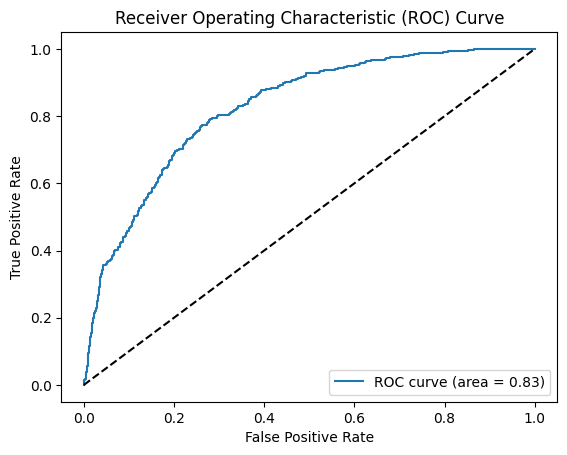

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUROC and AUC:", auc_score)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

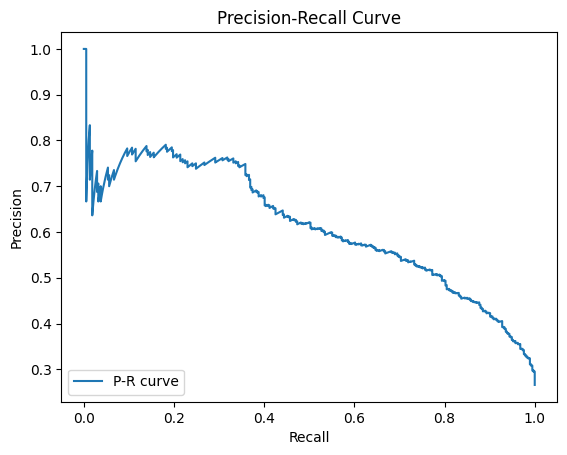

In [ ]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, label='P-R curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.5513196480938416


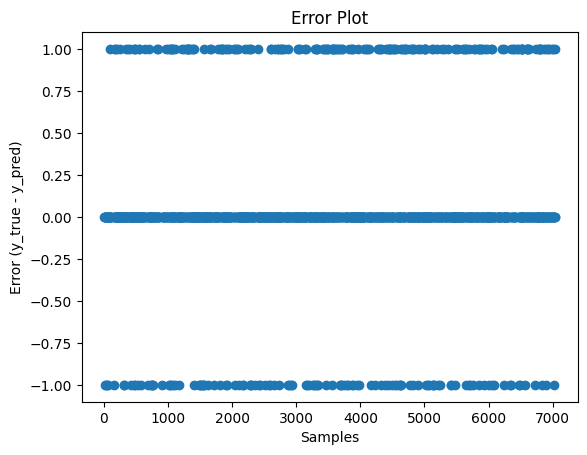

In [ ]:
errors = y_test - y_pred
plt.figure()
plt.plot(errors, marker='o', linestyle='')
plt.title('Error Plot')
plt.xlabel('Samples')
plt.ylabel('Error (y_true - y_pred)')
plt.show()

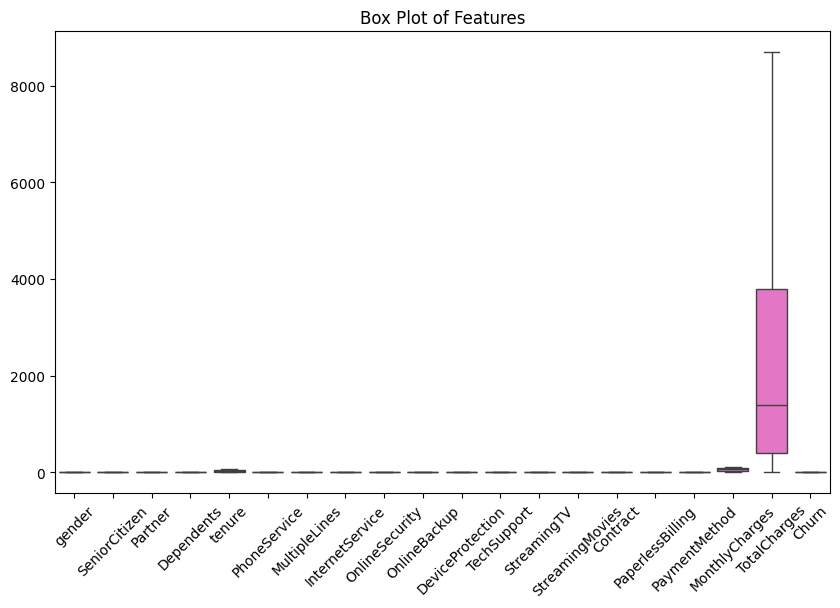

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, showfliers=False)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
# Lasso Logistic Regression for Classification
lasso_logistic = LogisticRegression(
    penalty='l1',         # Lasso regularization
    solver='liblinear',   # Required for L1 penalty
    C=1.0,                # Regularization strength
    random_state=42
)

# Training Lasso model
lasso_logistic.fit(X_train_scaled, y_train)

# Predictions
y_pred = lasso_logistic.predict(X_test_scaled)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

baac = (recall_score(y_test, y_pred) + (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0,
1]))) / 2
print("Balanced Accuracy (BAAC):", baac)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)

sensitivity = recall
print("Sensitivity:", sensitivity)

Confusion Matrix:
 [[920 113]
 [189 185]]
Accuracy: 0.7853589196872779
Balanced Accuracy (BAAC): 0.6926311402850325
Precision: 0.6208053691275168
Recall: 0.4946524064171123
Specificity: 0.8906098741529526
Sensitivity: 0.4946524064171123


AUROC and AUC: 0.8256492951840597


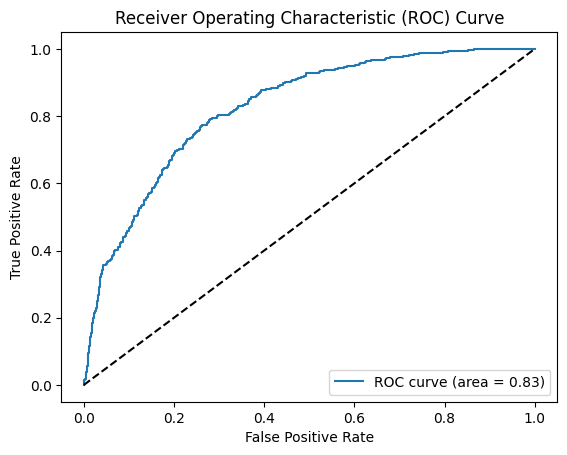

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUROC and AUC:", auc_score)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

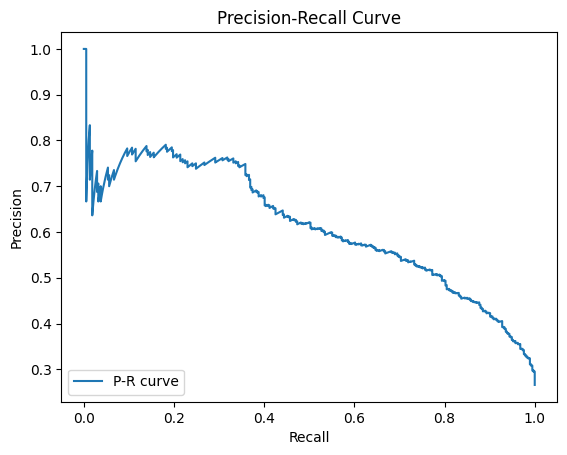

In [ ]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, label='P-R curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.5505952380952381


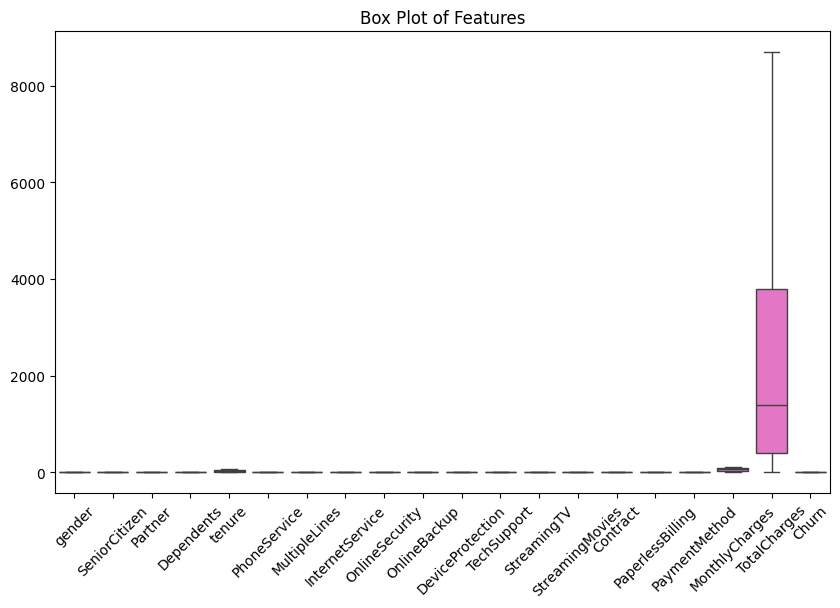

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, showfliers=False)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

baac = (recall_score(y_test, y_pred) + (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0,
1]))) / 2
print("Balanced Accuracy (BAAC):", baac)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)

sensitivity = recall
print("Sensitivity:", sensitivity)

Confusion Matrix:
 [[767 266]
 [101 273]]
Accuracy: 0.7391613361762616
Balanced Accuracy (BAAC): 0.7362220519643218
Precision: 0.5064935064935064
Recall: 0.7299465240641712
Specificity: 0.7424975798644724
Sensitivity: 0.7299465240641712


AUROC and AUC: 0.8130878858627848


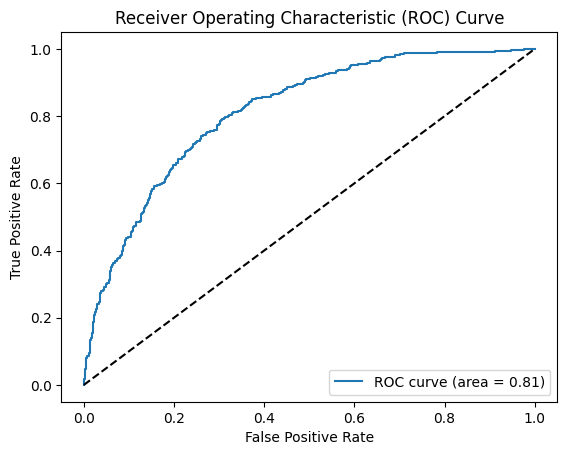

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUROC and AUC:", auc_score)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

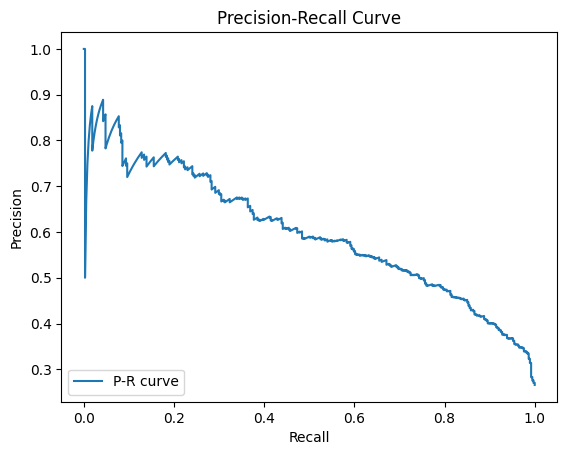

In [ ]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, label='P-R curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.74      0.75      1407



In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.5980284775465499


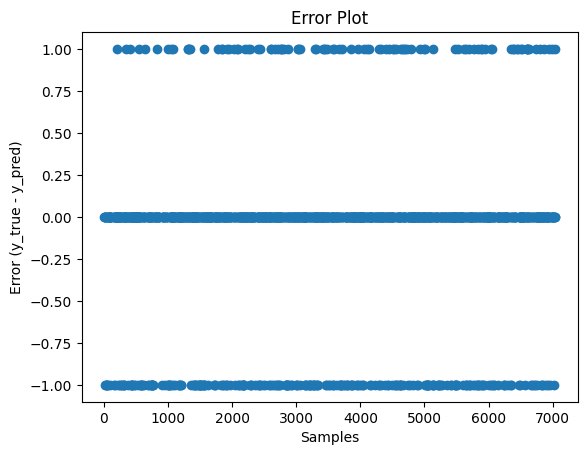

In [ ]:
errors = y_test - y_pred
plt.figure()
plt.plot(errors, marker='o', linestyle='')
plt.title('Error Plot')
plt.xlabel('Samples')
plt.ylabel('Error (y_true - y_pred)')
plt.show()

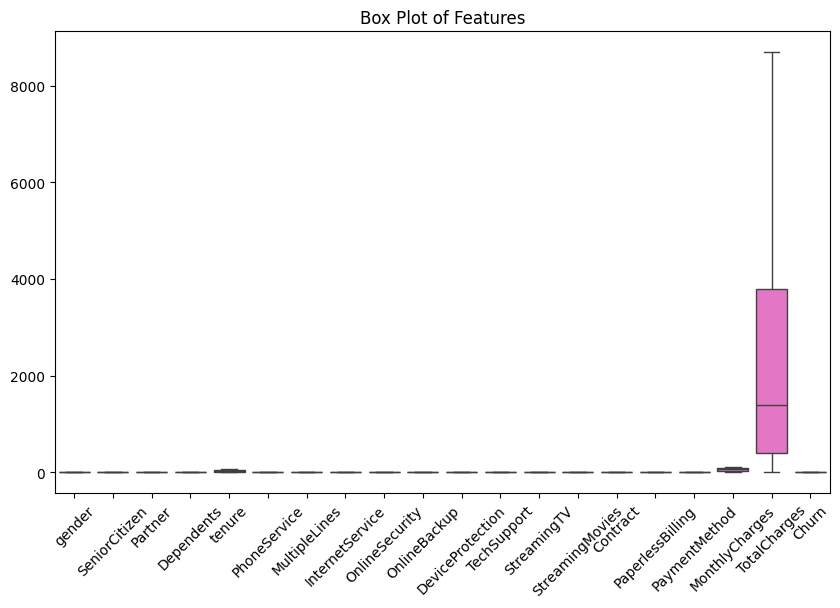

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, showfliers=False)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
#Predict on test set
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

baac = (recall_score(y_test, y_pred) + (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0,
1]))) / 2
print("Balanced Accuracy (BAAC):", baac)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)

sensitivity = recall
print("Sensitivity:", sensitivity)

Confusion Matrix:
 [[851 182]
 [183 191]]
Accuracy: 0.7405828002842928
Balanced Accuracy (BAAC): 0.6672546603786282
Precision: 0.5120643431635389
Recall: 0.5106951871657754
Specificity: 0.8238141335914811
Sensitivity: 0.5106951871657754


AUROC and AUC: 0.7571283991903547


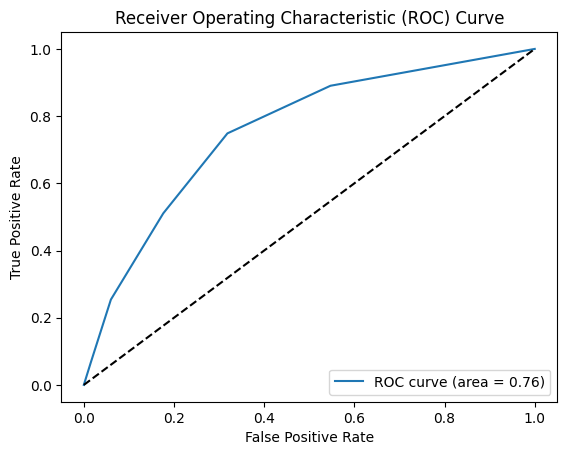

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUROC and AUC:", auc_score)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

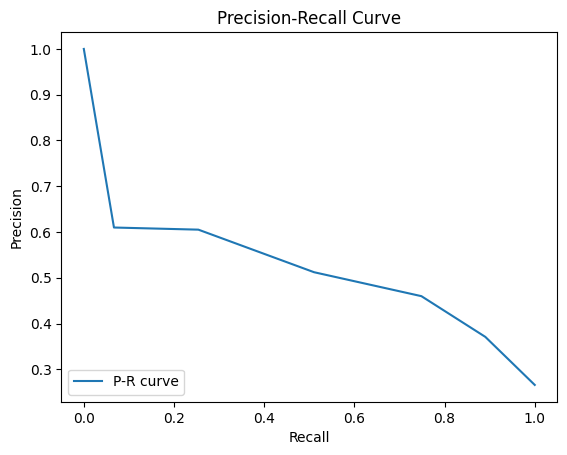

In [ ]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, label='P-R curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.5113788487282463


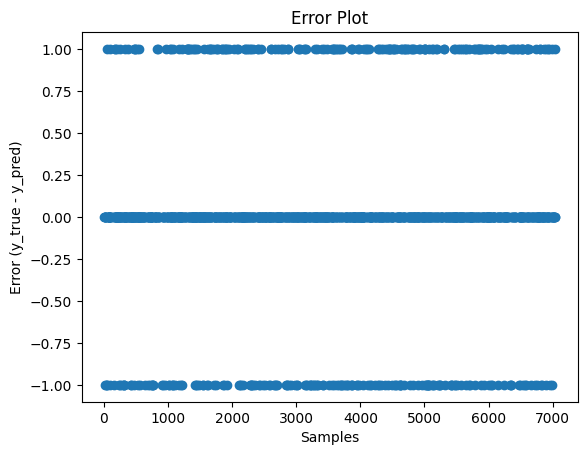

In [ ]:
errors = y_test - y_pred
plt.figure()
plt.plot(errors, marker='o', linestyle='')
plt.title('Error Plot')
plt.xlabel('Samples')
plt.ylabel('Error (y_true - y_pred)')
plt.show()

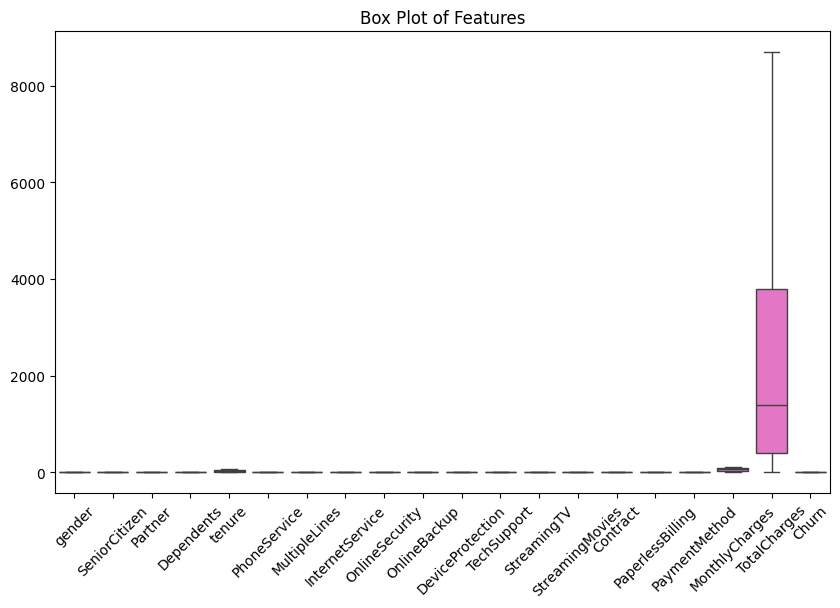

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, showfliers=False)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#SVM model
model = SVC(probability=True, kernel='rbf')
model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

baac = (recall_score(y_test, y_pred) + (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0,
1]))) / 2
print("Balanced Accuracy (BAAC):", baac)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)

sensitivity = recall
print("Sensitivity:", sensitivity)

Confusion Matrix:
 [[942  91]
 [203 171]]
Accuracy: 0.7910447761194029
Balanced Accuracy (BAAC): 0.6845631590663195
Precision: 0.6526717557251909
Recall: 0.4572192513368984
Specificity: 0.9119070667957405
Sensitivity: 0.4572192513368984


AUROC and AUC: 0.7785705411267737


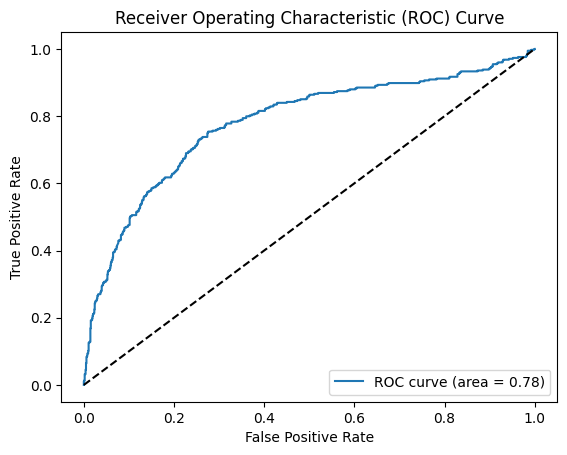

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUROC and AUC:", auc_score)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

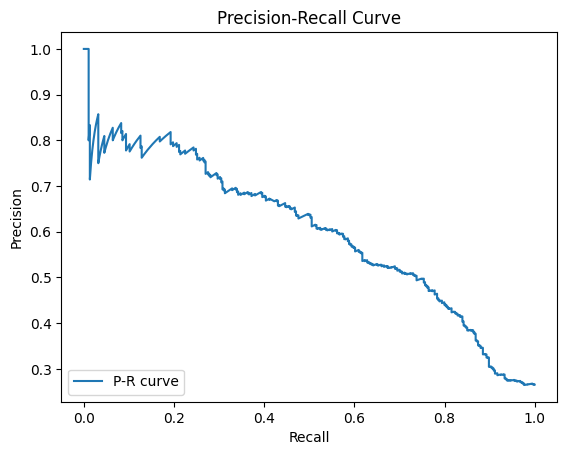

In [ ]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, label='P-R curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.65      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.5377358490566038


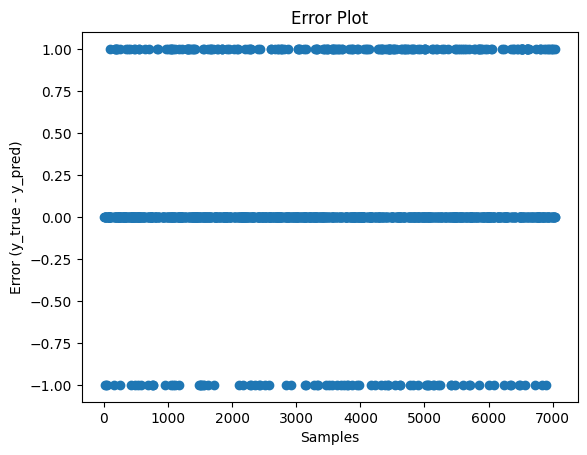

In [ ]:
errors = y_test - y_pred
plt.figure()
plt.plot(errors, marker='o', linestyle='')
plt.title('Error Plot')
plt.xlabel('Samples')
plt.ylabel('Error (y_true - y_pred)')
plt.show()

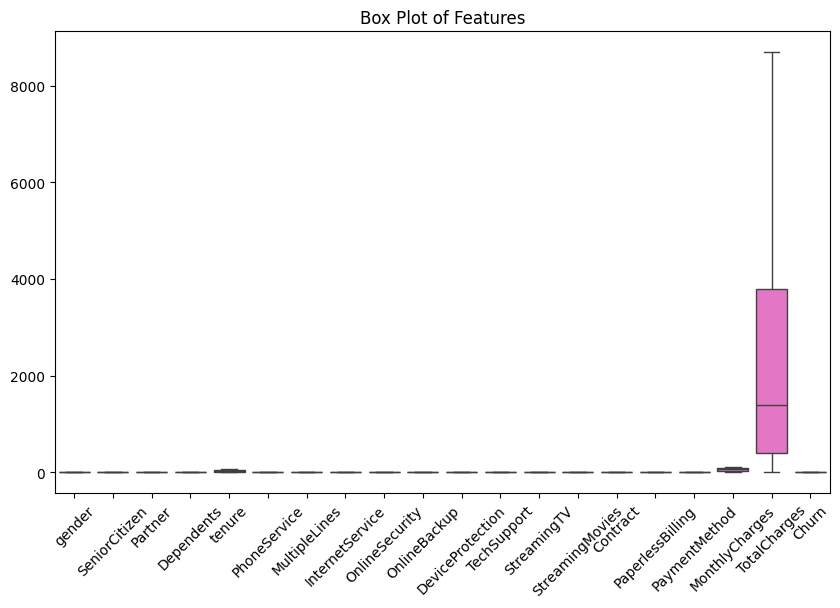

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, showfliers=False)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
y_pred = y_pred_rf
y_pred_prob = y_pred_prob_rf

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

baac = (recall_score(y_test, y_pred) + (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0,
1]))) / 2
print("Balanced Accuracy (BAAC):", baac)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)

sensitivity = recall
print("Sensitivity:", sensitivity)

Confusion Matrix:
 [[932 101]
 [194 180]]
Accuracy: 0.7903340440653873
Balanced Accuracy (BAAC): 0.6917549735726377
Precision: 0.6405693950177936
Recall: 0.48128342245989303
Specificity: 0.9022265246853823
Sensitivity: 0.48128342245989303


AUROC and AUC: 0.813891577928364


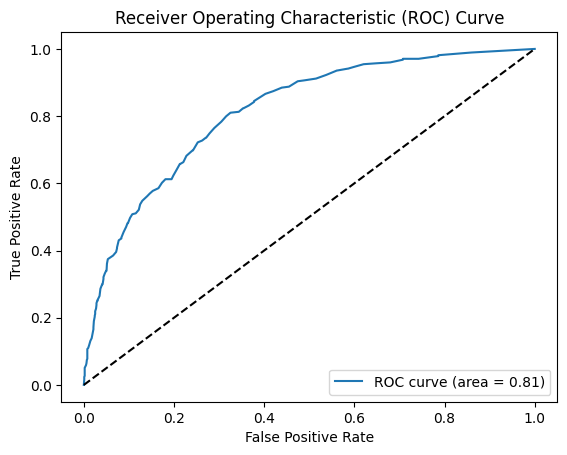

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUROC and AUC:", auc_score)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

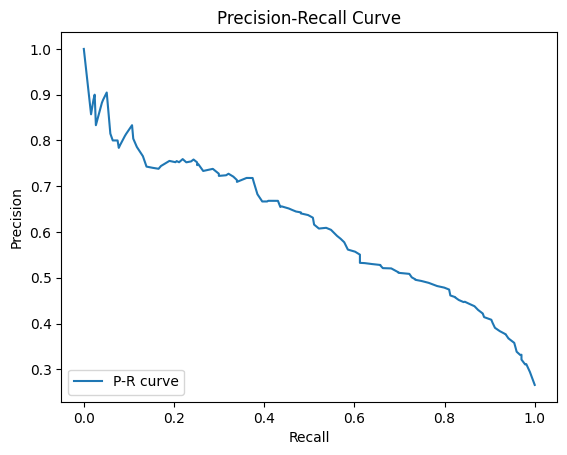

In [ ]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, label='P-R curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.549618320610687


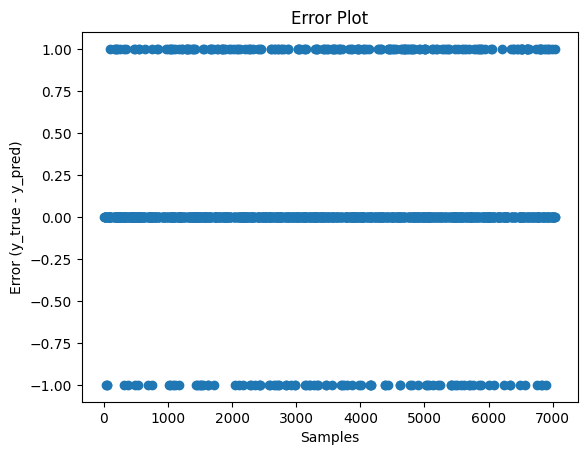

In [ ]:
errors = y_test - y_pred
plt.figure()
plt.plot(errors, marker='o', linestyle='')
plt.title('Error Plot')
plt.xlabel('Samples')
plt.ylabel('Error (y_true - y_pred)')
plt.show()

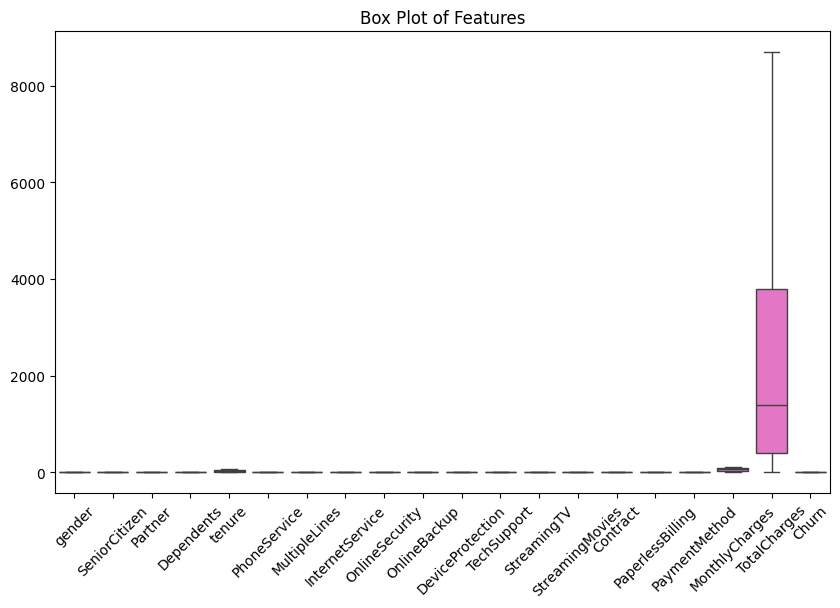

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, showfliers=False)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Models to evaluate
models = {
 'Logistic Regression': LogisticRegression(),
 'Lasso (using Logistic Regression)': LogisticRegression(penalty='l1', solver='saga',max_iter=5000),
 'GaussianNB': GaussianNB(),
 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
 'Support Vector Machine': SVC(probability=True, kernel='rbf'),
 'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

#Dictionary to store results
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Convert the results into a DataFrame for comparison
results_df = pd.DataFrame(results)

print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                               Model  Accuracy  Precision    Recall  F1 Score  \
0                Logistic Regression  0.782516   0.610390  0.502674  0.551320   
1  Lasso (using Logistic Regression)  0.776830   0.598684  0.486631  0.536873   
2                         GaussianNB  0.739161   0.506494  0.729947  0.598028   
3                K-Nearest Neighbors  0.773276   0.599278  0.443850  0.509985   
4             Support Vector Machine  0.734186   0.000000  0.000000  0.000000   
5                      Random Forest  0.792466   0.644366  0.489305  0.556231   

    ROC AUC  
0  0.825649  
1  0.797576  
2  0.813088  
3  0.736300  
4  0.788893  
5  0.813417  


<ipython-input-83-25102eaff080>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(results_df['Model'], rotation=45)
<ipython-input-83-25102eaff080>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(results_df['Model'], rotation=45)
<ipython-input-83-25102eaff080>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(results_df['Model'], rotation=45)
<ipython-input-83-25102eaff080>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(results_df['Model'], rotation=45)
<ipython-input-83-25102eaff080>:25: UserWarning: set_ticklabels() should only be used with a 

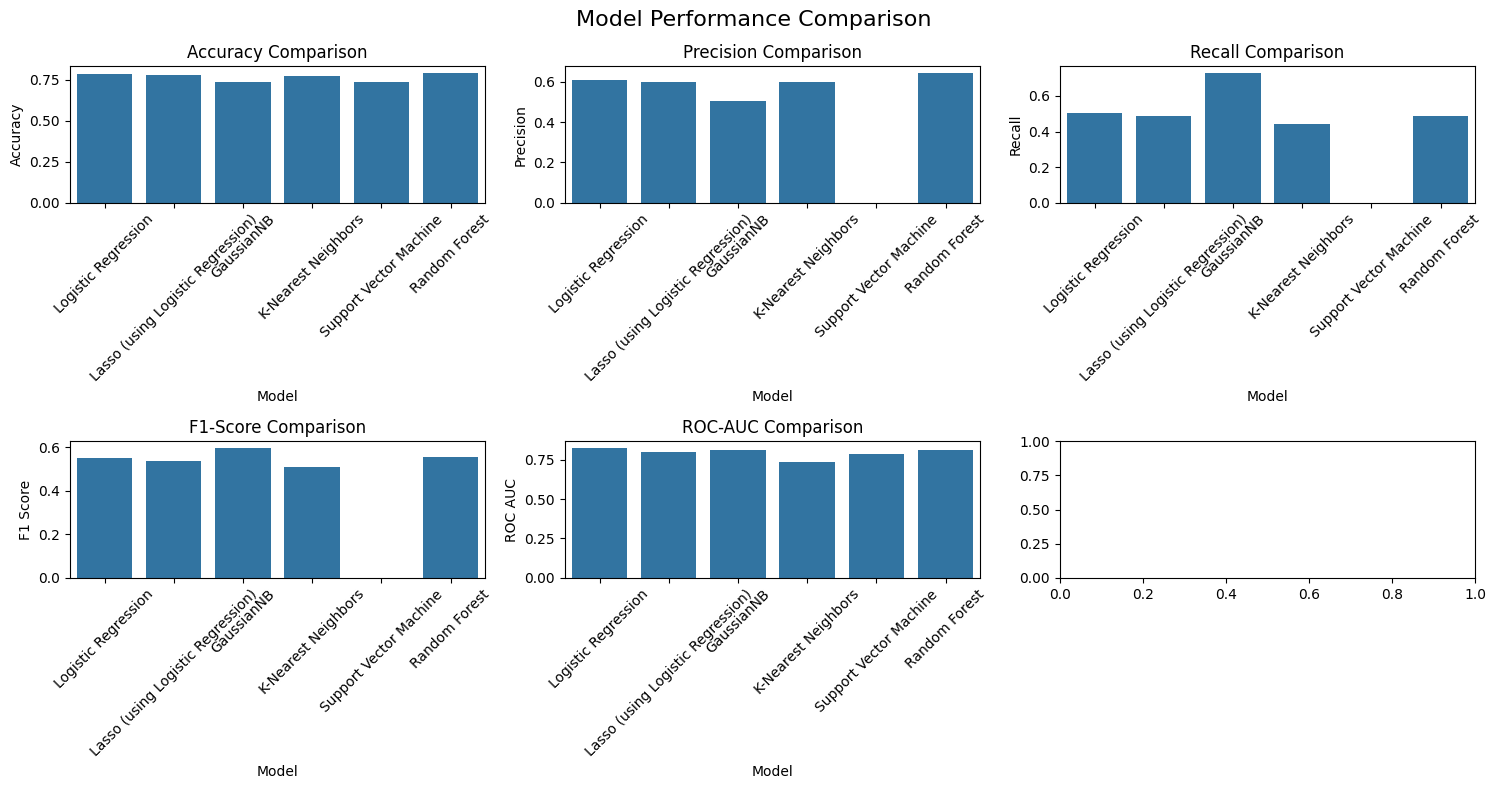

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Model Performance Comparison', fontsize=16)

sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xticklabels(results_df['Model'], rotation=45)

sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45)

sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[0, 2])
axes[0, 2].set_title('Recall Comparison')
axes[0, 2].set_xticklabels(results_df['Model'], rotation=45)

sns.barplot(x='Model', y='F1 Score', data=results_df, ax=axes[1, 0])
axes[1, 0].set_title('F1-Score Comparison')
axes[1, 0].set_xticklabels(results_df['Model'], rotation=45)

sns.barplot(x='Model', y='ROC AUC', data=results_df, ax=axes[1, 1])
axes[1, 1].set_title('ROC-AUC Comparison')
axes[1, 1].set_xticklabels(results_df['Model'], rotation=45)

plt.tight_layout()
plt.show()